# Natural Cycle data

In [1]:
#Importing libraries for data manipulation and plots
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [3]:
# Load CSV
df = pd.read_csv('data/NaturalCycle.csv', parse_dates=['Date'])

In [6]:
#Display the data read from the csv file to check that everything was imported correctly.
df

,Date,Temperature,Menstruation,LH test,Pregnancy test,Had sex,Notes,Skipped,Source,Data Flag,Menstruation Quantity,Cervical Mucus Consistency,Cervical Mucus Quantity,Sex Type,Libido,Covid Test
0,2020-08-11,36.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-12,36.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-13,36.49,SPOTTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-14,36.36,MENSTRUATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-15,36.19,MENSTRUATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-08-16,36.44,MENSTRUATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-08-17,36.50,MENSTRUATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-08-18,36.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-08-19,36.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-08-20,36.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


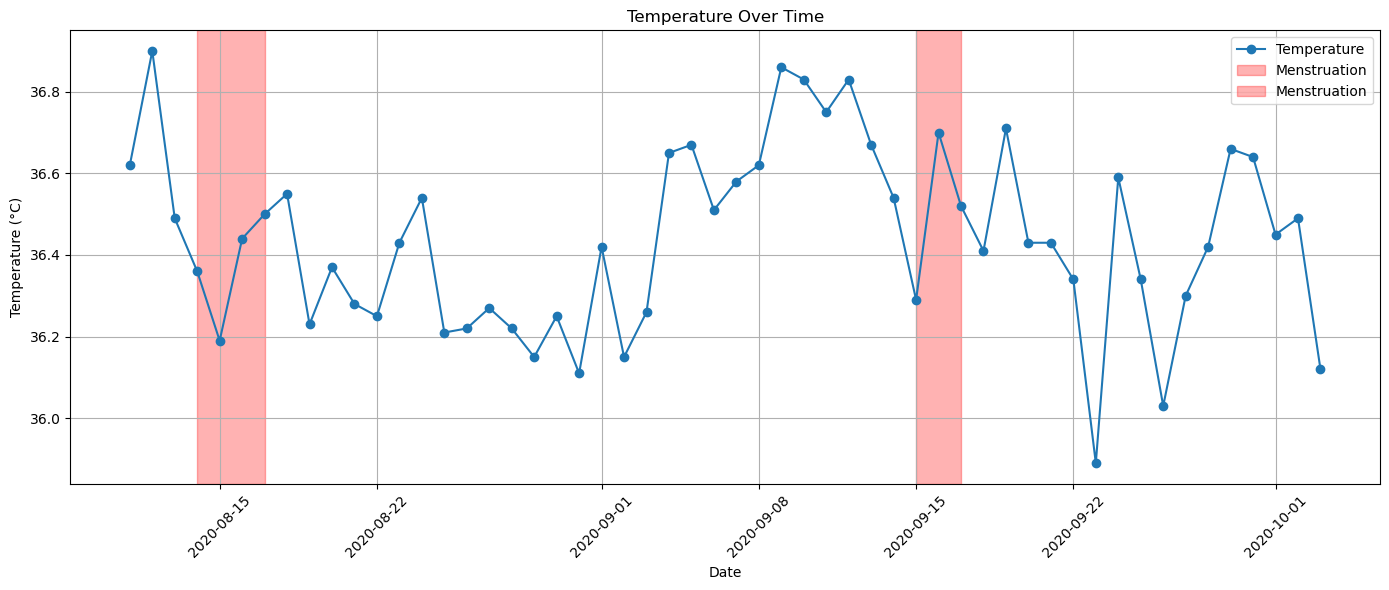

In [9]:
plt.figure(figsize=(14, 6))


# Plot all temperatures
plt.plot(df['Date'], df['Temperature'], label='Temperature', marker='o', linestyle='-')

# Highlight menstruation periods with a shaded rectangle
menstruation_days = df[df['Menstruation'] == 'MENSTRUATION']
ymin = df['Temperature'].min() - 0.1
ymax = df['Temperature'].max() + 0.1

if not menstruation_days.empty:
    periods = []
    start = None
    for i in range(len(menstruation_days)):
        current = menstruation_days.iloc[i]['Date']
        if start is None:
            start = current
        if i == len(menstruation_days) - 1 or (menstruation_days.iloc[i + 1]['Date'] - current).days > 1:
            end = current
            periods.append((start, end))
            start = None

    for start, end in periods:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Menstruation')

# Labels and legend
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()